<a href="https://colab.research.google.com/github/anushkaawasthi/Ask_It/blob/master/Football%20Prediction%20Engine.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [11]:
pip install requests pandas openpyxl

In [12]:
import pandas as pd

# Load sample EPL data CSV (adjust filename if needed)
df = pd.read_csv('/content/football_matches.csv')  # You can also concatenate multiple seasons

# Display initial info
print(df.shape)
print(df.columns)
df.head()


(4070, 33)
Index(['season', 'date', 'home_team', 'away_team', 'home_clearances',
       'home_corners', 'home_fouls_conceded', 'home_offsides', 'home_passes',
       'home_possession', 'home_red_cards', 'home_shots',
       'home_shots_on_target', 'home_tackles', 'home_touches',
       'home_yellow_cards', 'away_clearances', 'away_corners',
       'away_fouls_conceded', 'away_offsides', 'away_passes',
       'away_possession', 'away_red_cards', 'away_shots',
       'away_shots_on_target', 'away_tackles', 'away_touches',
       'away_yellow_cards', 'home_goals', 'away_goals', 'full_time_result',
       'btts', 'over_25'],
      dtype='object')


,season,date,home_team,away_team,home_clearances,home_corners,home_fouls_conceded,home_offsides,home_passes,home_possession,...,away_shots,away_shots_on_target,away_tackles,away_touches,away_yellow_cards,home_goals,away_goals,full_time_result,btts,over_25
0,10/11,2010-11-01,Blackpool,West Bromwich Albion,15,8,16,2,550,65.4,...,14,4,15,472,3,2,1,H,1,1
1,10/11,2011-04-11,Liverpool,Manchester City,16,6,6,5,527,53.1,...,12,2,27,687,0,3,0,H,0,1
2,10/11,2010-12-13,Manchester United,Arsenal,26,5,9,3,430,46.1,...,11,5,20,737,4,1,0,H,0,0
3,10/11,2010-09-13,Stoke City,Aston Villa,26,8,12,2,277,43.3,...,11,5,20,599,2,2,1,H,1,1
4,10/11,2011-02-14,Fulham,Chelsea,50,4,11,1,333,37.4,...,25,3,23,837,1,0,0,D,0,0


In [16]:
# Select basic match statistics (both teams)
stats_cols = [
    'home_clearances', 'home_corners', 'home_fouls_conceded', 'home_offsides', 'home_passes',
    'home_possession', 'home_red_cards', 'home_shots', 'home_shots_on_target', 'home_tackles',
    'home_yellow_cards', 'away_clearances', 'away_corners', 'away_fouls_conceded', 'away_offsides',
    'away_passes', 'away_possession', 'away_red_cards', 'away_shots', 'away_shots_on_target',
    'away_tackles', 'away_yellow_cards'
]

# Fill missing values (if any)
df[stats_cols] = df[stats_cols].fillna(0)


In [19]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['ftr_encoded'] = le.fit_transform(df['full_time_result'])  # H=0, D=1, A=2
print("Encoded classes:", le.classes_)  # Just to check


Encoded classes: ['A' 'D' 'H']


In [20]:
print("Full Time Result:")
print(df['full_time_result'].value_counts())

print("\nBTTS:")
print(df['btts'].value_counts())

print("\nOver 2.5 Goals:")
print(df['over_25'].value_counts())


Full Time Result:
full_time_result
H    1835
A    1235
D    1000
Name: count, dtype: int64

BTTS:
btts
1    2082
0    1988
Name: count, dtype: int64

Over 2.5 Goals:
over_25
1    2131
0    1939
Name: count, dtype: int64


In [21]:
df.to_csv('/content/football_matches.csv', index=False)


In [22]:
# List of stats to include (home + away)
stats_cols = [
    'home_clearances', 'home_corners', 'home_fouls_conceded', 'home_offsides', 'home_passes',
    'home_possession', 'home_red_cards', 'home_shots', 'home_shots_on_target', 'home_tackles',
    'home_yellow_cards', 'away_clearances', 'away_corners', 'away_fouls_conceded', 'away_offsides',
    'away_passes', 'away_possession', 'away_red_cards', 'away_shots', 'away_shots_on_target',
    'away_tackles', 'away_yellow_cards'
]

# Optional: fill any missing stats with 0 or median
df[stats_cols] = df[stats_cols].fillna(0)


In [23]:
# For Full Time Result (Multiclass): Convert H/D/A to numeric labels
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['ftr_encoded'] = le.fit_transform(df['full_time_result'])  # H=0, D=1, A=2 (check with le.classes_)


In [24]:
from sklearn.model_selection import train_test_split

# Features
X = df[stats_cols]

# Targets
y_ftr = df['ftr_encoded']      # Full Time Result
y_btts = df['btts']            # Both Teams To Score
y_over = df['over_25']         # Over/Under 2.5 Goals

# Splits
X_train_ftr, X_test_ftr, y_train_ftr, y_test_ftr = train_test_split(X, y_ftr, test_size=0.2, random_state=42)
X_train_btts, X_test_btts, y_train_btts, y_test_btts = train_test_split(X, y_btts, test_size=0.2, random_state=42)
X_train_over, X_test_over, y_train_over, y_test_over = train_test_split(X, y_over, test_size=0.2, random_state=42)


In [25]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# 1. Full Time Result
clf_ftr = RandomForestClassifier(random_state=42)
clf_ftr.fit(X_train_ftr, y_train_ftr)
y_pred_ftr = clf_ftr.predict(X_test_ftr)
print("🔵 Full Time Result (H/D/A):")
print(classification_report(y_test_ftr, y_pred_ftr, target_names=le.classes_))

# 2. BTTS
clf_btts = RandomForestClassifier(random_state=42)
clf_btts.fit(X_train_btts, y_train_btts)
y_pred_btts = clf_btts.predict(X_test_btts)
print("\n🟢 BTTS (Both Teams To Score):")
print(classification_report(y_test_btts, y_pred_btts))

# 3. Over/Under 2.5
clf_over = RandomForestClassifier(random_state=42)
clf_over.fit(X_train_over, y_train_over)
y_pred_over = clf_over.predict(X_test_over)
print("\n🔴 Over 2.5 Goals:")
print(classification_report(y_test_over, y_pred_over))


🔵 Full Time Result (H/D/A):
              precision    recall  f1-score   support

           A       0.64      0.68      0.66       250
           D       0.51      0.21      0.29       203
           H       0.67      0.87      0.76       361

    accuracy                           0.65       814
   macro avg       0.61      0.59      0.57       814
weighted avg       0.62      0.65      0.61       814


🟢 BTTS (Both Teams To Score):
              precision    recall  f1-score   support

           0       0.63      0.60      0.61       395
           1       0.64      0.66      0.65       419

    accuracy                           0.63       814
   macro avg       0.63      0.63      0.63       814
weighted avg       0.63      0.63      0.63       814


🔴 Over 2.5 Goals:
              precision    recall  f1-score   support

           0       0.66      0.68      0.67       377
           1       0.72      0.69      0.70       437

    accuracy                           0.69       

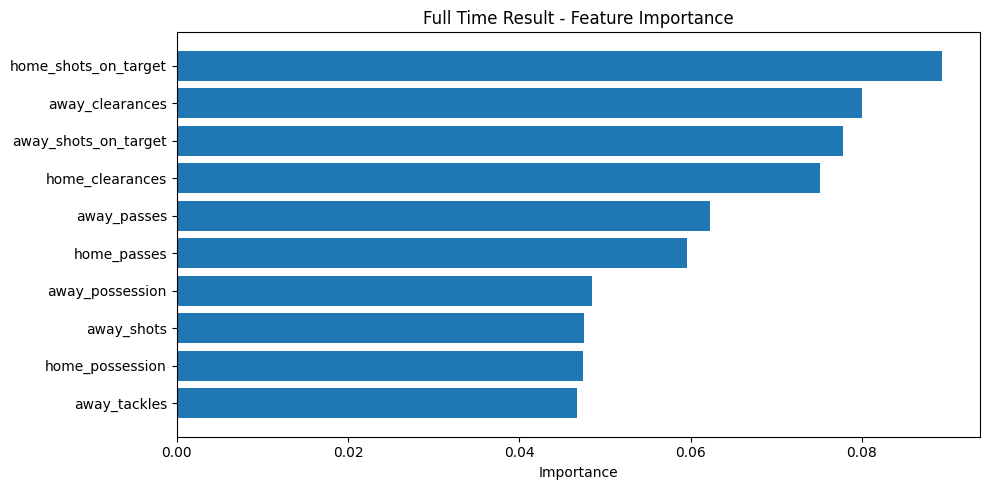

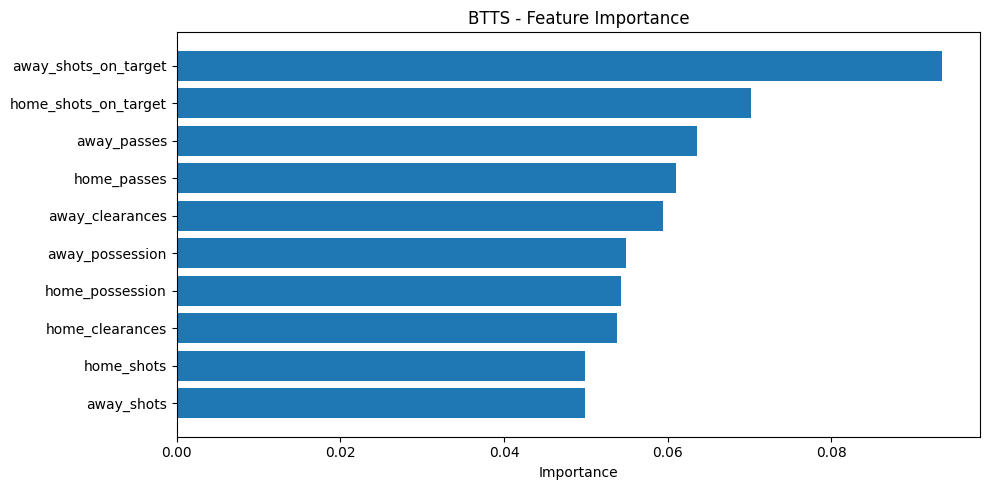

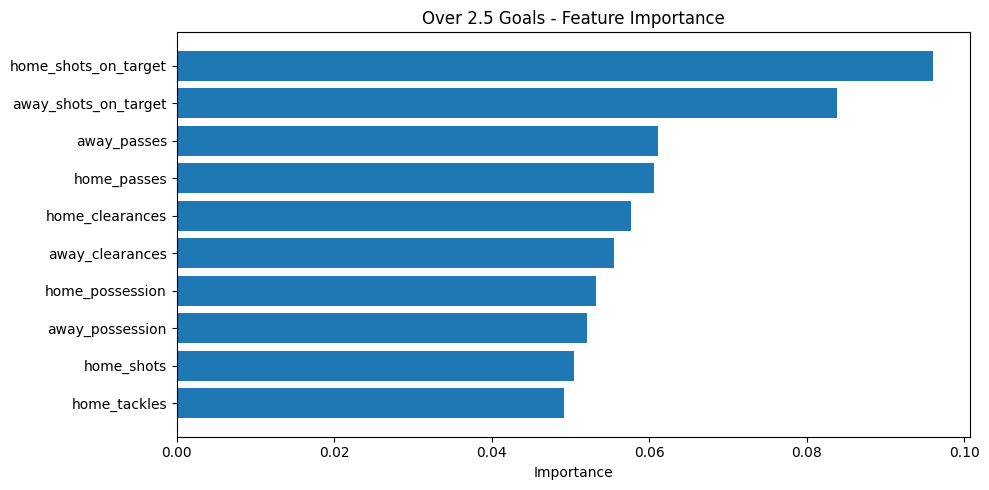

In [26]:
import matplotlib.pyplot as plt

def plot_feature_importance(model, features, title):
    importances = model.feature_importances_
    indices = sorted(range(len(importances)), key=lambda k: importances[k], reverse=True)
    top_features = [features[i] for i in indices[:10]]
    top_importances = [importances[i] for i in indices[:10]]

    plt.figure(figsize=(10, 5))
    plt.barh(top_features[::-1], top_importances[::-1])
    plt.xlabel("Importance")
    plt.title(title)
    plt.tight_layout()
    plt.show()

plot_feature_importance(clf_ftr, stats_cols, "Full Time Result - Feature Importance")
plot_feature_importance(clf_btts, stats_cols, "BTTS - Feature Importance")
plot_feature_importance(clf_over, stats_cols, "Over 2.5 Goals - Feature Importance")


In [27]:
pip install xgboost


In [28]:
from xgboost import XGBClassifier

clf_btts = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
clf_btts.fit(X_train_btts, y_train_btts)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, ...)

In [ ]:
from flask import Flask, request, jsonify
import joblib
import pandas as pd
import numpy as np
from datetime import datetime
import logging

# Set up logging
logging.basicConfig(level=logging.INFO)
logger = logging.getLogger(__name__)

app = Flask(__name__)

# Load models at startup
try:
    clf_ftr = joblib.load("clf_ftr.joblib")
    clf_btts = joblib.load("clf_btts.joblib")
    clf_over = joblib.load("clf_over.joblib")
    logger.info("Models loaded successfully")
except Exception as e:
    logger.error(f"Error loading models: {e}")

# Mapping for full-time result
ftr_label_map = {0: 'H', 1: 'D', 2: 'A'}
ftr_label_names = {'H': 'Home Win', 'D': 'Draw', 'A': 'Away Win'}

@app.route('/health', methods=['GET'])
def health_check():
    """Health check endpoint for n8n monitoring"""
    return jsonify({
        "status": "healthy",
        "timestamp": datetime.now().isoformat(),
        "version": "1.0.0"
    })

@app.route('/predict', methods=['POST'])
def predict():
    """Main prediction endpoint for n8n"""
    try:
        data = request.get_json()

        # Validate required fields
        required_fields = [
            'home_clearances', 'home_corners', 'home_fouls_conceded', 'home_offsides',
            'home_passes', 'home_possession', 'home_red_cards', 'home_shots',
            'home_shots_on_target', 'home_tackles', 'home_yellow_cards',
            'away_clearances', 'away_corners', 'away_fouls_conceded', 'away_offsides',
            'away_passes', 'away_possession', 'away_red_cards', 'away_shots',
            'away_shots_on_target', 'away_tackles', 'away_yellow_cards'
        ]

        missing_fields = [field for field in required_fields if field not in data]
        if missing_fields:
            return jsonify({
                "error": "Missing required fields",
                "missing_fields": missing_fields
            }), 400

        # Prepare features
        features = pd.DataFrame([{field: data[field] for field in required_fields}])

        # Get predictions with probabilities
        ftr_proba = clf_ftr.predict_proba(features)[0]
        btts_proba = clf_btts.predict_proba(features)[0]
        over_proba = clf_over.predict_proba(features)[0]

        # Get predictions
        ftr_pred = clf_ftr.predict(features)[0]
        btts_pred = clf_btts.predict(features)[0]
        over_pred = clf_over.predict(features)[0]

        # Format response for n8n
        response = {
            "success": True,
            "timestamp": datetime.now().isoformat(),
            "match_info": {
                "home_team": data.get("home_team", "Home Team"),
                "away_team": data.get("away_team", "Away Team"),
                "match_date": data.get("match_date", "")
            },
            "predictions": {
                "full_time_result": {
                    "prediction": ftr_label_map[ftr_pred],
                    "prediction_name": ftr_label_names[ftr_label_map[ftr_pred]],
                    "probabilities": {
                        "home_win": round(float(ftr_proba[0]), 3),
                        "draw": round(float(ftr_proba[1]), 3),
                        "away_win": round(float(ftr_proba[2]), 3)
                    },
                    "confidence": round(float(max(ftr_proba)), 3)
                },
                "both_teams_to_score": {
                    "prediction": bool(btts_pred),
                    "prediction_text": "Yes" if btts_pred else "No",
                    "probabilities": {
                        "no": round(float(btts_proba[0]), 3),
                        "yes": round(float(btts_proba[1]), 3)
                    },
                    "confidence": round(float(max(btts_proba)), 3)
                },
                "over_2_5_goals": {
                    "prediction": bool(over_pred),
                    "prediction_text": "Over" if over_pred else "Under",
                    "probabilities": {
                        "under": round(float(over_proba[0]), 3),
                        "over": round(float(over_proba[1]), 3)
                    },
                    "confidence": round(float(max(over_proba)), 3)
                }
            },
            "model_info": {
                "model_type": "Random Forest Ensemble",
                "features_used": len(required_fields),
                "training_data_version": "1.0"
            }
        }

        logger.info(f"Prediction made for {data.get('home_team', 'Unknown')} vs {data.get('away_team', 'Unknown')}")
        return jsonify(response)

    except Exception as e:
        logger.error(f"Prediction error: {e}")
        return jsonify({
            "success": False,
            "error": str(e),
            "timestamp": datetime.now().isoformat()
        }), 500

@app.route('/predict/batch', methods=['POST'])
def predict_batch():
    """Batch prediction endpoint for multiple matches"""
    try:
        data = request.get_json()
        matches = data.get('matches', [])

        if not matches:
            return jsonify({"error": "No matches provided"}), 400

        results = []
        for match in matches:
            # Use the single prediction logic
            match_request = request
            match_request.json = match

            # This is a simplified version - in production, refactor the prediction logic
            # into a separate function to avoid this workaround

        return jsonify({
            "success": True,
            "timestamp": datetime.now().isoformat(),
            "batch_size": len(matches),
            "results": results
        })

    except Exception as e:
        logger.error(f"Batch prediction error: {e}")
        return jsonify({
            "success": False,
            "error": str(e),
            "timestamp": datetime.now().isoformat()
        }), 500

@app.route('/models/info', methods=['GET'])
def model_info():
    """Get information about loaded models"""
    try:
        info = {
            "models": {
                "full_time_result": {
                    "type": str(type(clf_ftr).__name__),
                    "classes": ["Home Win", "Draw", "Away Win"]
                },
                "both_teams_to_score": {
                    "type": str(type(clf_btts).__name__),
                    "classes": ["No", "Yes"]
                },
                "over_2_5_goals": {
                    "type": str(type(clf_over).__name__),
                    "classes": ["Under", "Over"]
                }
            },
            "features": [
                'home_clearances', 'home_corners', 'home_fouls_conceded', 'home_offsides',
                'home_passes', 'home_possession', 'home_red_cards', 'home_shots',
                'home_shots_on_target', 'home_tackles', 'home_yellow_cards',
                'away_clearances', 'away_corners', 'away_fouls_conceded', 'away_offsides',
                'away_passes', 'away_possession', 'away_red_cards', 'away_shots',
                'away_shots_on_target', 'away_tackles', 'away_yellow_cards'
            ],
            "last_updated": datetime.now().isoformat()
        }
        return jsonify(info)
    except Exception as e:
        return jsonify({"error": str(e)}), 500

if __name__ == '__main__':
    app.run(host='0.0.0.0', port=5000, debug=False)

 * Serving Flask app '__main__'
 * Debug mode: off


INFO:werkzeug:WARNING: This is a development server. Do not use it in a production deployment. Use a production WSGI server instead.
 * Running on all addresses (0.0.0.0)
 * Running on http://127.0.0.1:5000
 * Running on http://172.28.0.12:5000
INFO:werkzeug:Press CTRL+C to quit
